## Libraries

In [3]:
import pandas as pd
import os

# Scraping the data

In [4]:
# Add Data into app
premier_league_url = "https://fbref.com/en/comps/20/2018-2019/2018-2019-Bundesliga-Stats"

# Only want to keep the first dataframe and the columns indicated below
prem_league_df = pd.read_html(premier_league_url)[0]
prem_columns = ["Rk", "Squad", "MP", "W", "L", "GF", "GA", "GD", "Pts", "Top Team Scorer", "Notes"]
prem_df = prem_league_df[prem_columns]
prem_df.to_csv('./data/Germany/Germany2018-2019.csv', index=False)

In [60]:
def getData(year):

    #url = "https://fbref.com/en/comps/11/2021-2022/2021-2022-Serie-A-Stats"
    url = "https://fbref.com/en/comps/20/"+ str(year) + "-" + str(year+1) + "/" + str(year) + "-" + str(year+1) + "-Serie-A-Stats"

    # Only want to keep the first dataframe and the columns indicated below
    league_df = pd.read_html(url)[0]
    cols = ["Rk", "Squad", "MP", "W", "L", "GF", "GA", "GD", "Pts", "Top Team Scorer", "Notes"]
    df = league_df[cols]
    csv = "./data/Italy" + str(year) + "-" + str(year +1) + ".csv"
    df.to_csv(csv, index=False)

In [61]:
for val in list(range(2006, 2021)):
    getData(val)

# Analyzing queried Champions League data

In [2]:
df = pd.read_csv('./data/ChampionsLeagueData.csv').dropna()[['Season', 'Champion', 'Runner-Up', 'Top Scorer']]
df.head()

,Season,Champion,Runner-Up,Top Scorer
1,2023-2024,Real Madrid,Dortmund,"Harry Kane, Kylian Mbappé - 8"
2,2022-2023,Manchester City,Internazionale,Erling Haaland - 12
3,2021-2022,Real Madrid,Liverpool,Karim Benzema - 15
4,2020-2021,Chelsea,Manchester City,Erling Haaland - 10
5,2019-2020,Bayern Munich,Paris Saint-Germain,Robert Lewandowski - 15


In [7]:
# Add champions league data to the analysis
champions_league_url = "https://fbref.com/en/comps/8/history/Champions-League-Seasons"

# Only want to keep the first dataframe and the columns indicated below
champions_league_df = pd.read_html(champions_league_url)[0]
champions_columns = ["Season", "Champion", "Runner-Up", "Top Scorer"]
champions_df = champions_league_df[champions_columns]
champions_df.to_csv('./data/ChampionsLeagueData.csv')

In [8]:
df = pd.read_csv('./data/ChampionsLeagueData.csv')[['Season', 'Champion', 'Runner-Up', 'Top Scorer']]
df.head()

,Season,Champion,Runner-Up,Top Scorer
0,2024-2025,NaN,NaN,NaN
1,2023-2024,Real Madrid,Dortmund,"Harry Kane, Kylian Mbappé - 8"
2,2022-2023,Manchester City,Internazionale,Erling Haaland - 12
3,2021-2022,Real Madrid,Liverpool,Karim Benzema - 15
4,2020-2021,Chelsea,Manchester City,Erling Haaland - 10


In [9]:
d = {}
for team in df['Champion'].dropna().to_list():
    if team in d:
        d[team] += 1
    else:
        d[team] = 1

C:\Users\arnav\AppData\Local\Temp\ipykernel_39448\2236145854.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wins', y='Team', data=data, palette='viridis')


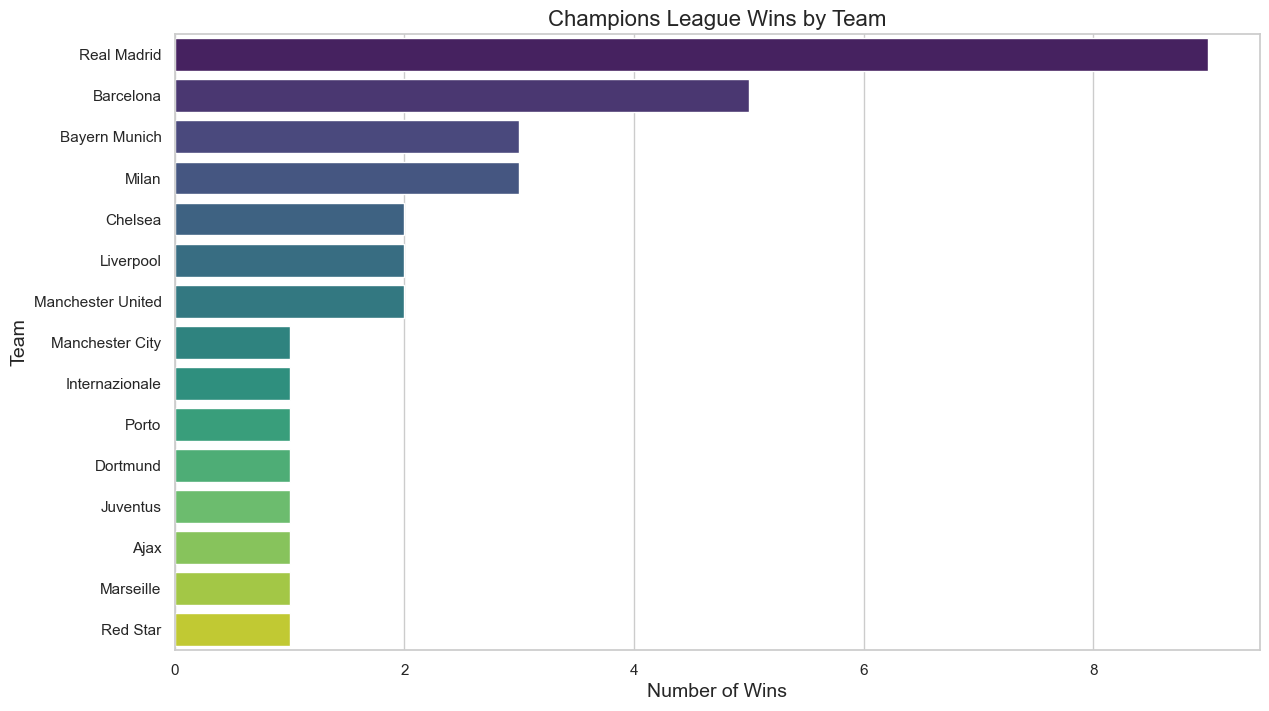

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the dictionary to a DataFrame
data = pd.DataFrame(list(d.items()), columns=['Team', 'Wins'])

# Sort the DataFrame by the number of wins
data = data.sort_values(by='Wins', ascending=False)

# Create the Seaborn bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Wins', y='Team', data=data, palette='viridis')

# Add title and labels
plt.title('Champions League Wins by Team', fontsize=16)
plt.xlabel('Number of Wins', fontsize=14)
plt.ylabel('Team', fontsize=14)

# Show the plot
plt.show()


## Analyzing the league data

In [4]:
def analyzeLeague(leagueCountry):
    dfs = []
    filenames = os.listdir('data' + '/' + leagueCountry)
    for file in filenames:
        df = pd.read_csv('data/' + leagueCountry + "/" + file)
        dfs.append(df)
    return dfs
leagueDFs = analyzeLeague("England")
print(leagueDFs[0].iloc[0]['Squad'])
print(leagueDFs[0].iloc[0]['Pts'])

Manchester Utd
89


In [28]:
def getTop5TeamsByPoint(dfs):
    topTeams = []
    years = list(range(2006,2024))
    for i in range(len(dfs)):

        temp = {
            'Team': leagueDFs[i].iloc[0]['Squad'],
            'Points': leagueDFs[i].iloc[0]['Pts'],
            'Year': years[i]
        }
        topTeams.append(temp)
    
    top10Teams = sorted(topTeams, key=lambda d: d['Points'], reverse=True)[:10]

    return top10Teams

getTop5TeamsByPoint(leagueDFs)


[{'Team': 'Manchester City', 'Points': 100, 'Year': 2017},
 {'Team': 'Liverpool', 'Points': 99, 'Year': 2019},
 {'Team': 'Manchester City', 'Points': 98, 'Year': 2018},
 {'Team': 'Chelsea', 'Points': 93, 'Year': 2016},
 {'Team': 'Manchester City', 'Points': 93, 'Year': 2021},
 {'Team': 'Manchester City', 'Points': 91, 'Year': 2023},
 {'Team': 'Manchester Utd', 'Points': 90, 'Year': 2008},
 {'Team': 'Manchester Utd', 'Points': 89, 'Year': 2006},
 {'Team': 'Manchester City', 'Points': 89, 'Year': 2011},
 {'Team': 'Manchester Utd', 'Points': 89, 'Year': 2012}]

In [30]:
def goldenBoot(dfs):
    topData = []
    years = list(range(2006,2024))

    for i in range(len(dfs)):
        topScorer = dfs[i]['Top Team Scorer'].to_list()
        maxVal = 0
        playerName = 'name'
        for scorer in topScorer:
            temp = scorer.split(' - ')
            if int(temp[1]) > maxVal:
                maxVal = int(temp[1])
                playerName = temp[0]
        topData.append(
            {
                'Name': playerName,
                'Goals': maxVal,
                'Year': years[i]
            }
        )

        top10GoalScorers = sorted(topData, key=lambda d: d['Goals'], reverse=True)[:10]

        
    return top10GoalScorers
goldenBoot(leagueDFs)


[{'Name': 'Erling Haaland', 'Goals': 36, 'Year': 2022},
 {'Name': 'Mohamed Salah', 'Goals': 32, 'Year': 2017},
 {'Name': 'Cristiano Ronaldo', 'Goals': 31, 'Year': 2007},
 {'Name': 'Luis Suárez', 'Goals': 31, 'Year': 2013},
 {'Name': 'Robin van Persie', 'Goals': 30, 'Year': 2011},
 {'Name': 'Didier Drogba', 'Goals': 29, 'Year': 2009},
 {'Name': 'Harry Kane', 'Goals': 29, 'Year': 2016},
 {'Name': 'Erling Haaland', 'Goals': 27, 'Year': 2023},
 {'Name': 'Robin van Persie', 'Goals': 26, 'Year': 2012},
 {'Name': 'Sergio Agüero', 'Goals': 26, 'Year': 2014}]

In [ ]:
#for scorer in df['Top Scorer'].dropna().to_list():
#    data = scorer.split(' - ')